# Assignmnent
# Create another jupyter notebook and scale the x dataframe. Also use SVR
# and Logistic regressors to predict so asto compare which model performs
# better

In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv("real_estate_kaggle.csv")
data.head(2)


,Unnamed: 0,area,rooms,suites,bathrooms,parkings,price,neighborhood
0,1,230.0,3,3,5,3,3790000.0,JA
1,2,85.0,2,1,2,1,1390000.0,JA


In [3]:
#sc = MinMaxScaler()
#data[["Scaleprice"]] = sc.fit_transform(data[["price"]])
#data


In [4]:
nan_value = float("NaN")
data.replace(to_replace = '--', value = nan_value,inplace = True)

In [5]:
data['area'] = data['area'].fillna(data['area'].mean())
data['rooms']= data['rooms'].fillna("3")

In [6]:
data.dropna(axis = 0, inplace = True)

In [7]:
data.drop("Unnamed: 0", axis=1, inplace=True)

<Axes: xlabel='rooms', ylabel='count'>

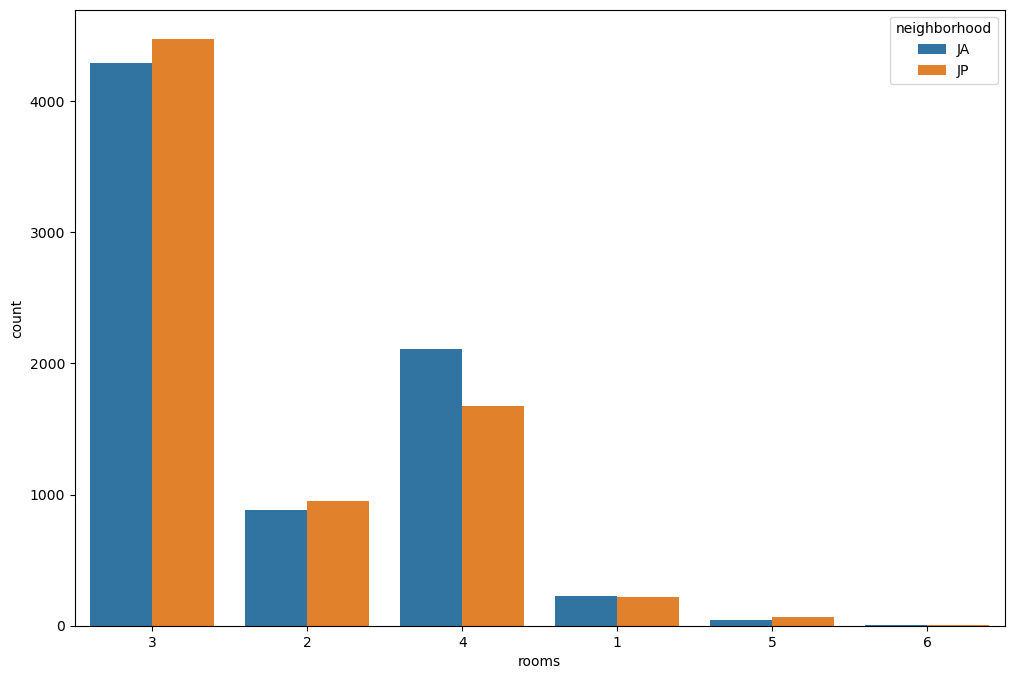

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
plt.figure(figsize=[12,8])
sns.countplot(x = data.rooms, hue =data.neighborhood, data = data)

<Axes: xlabel='bathrooms', ylabel='price'>

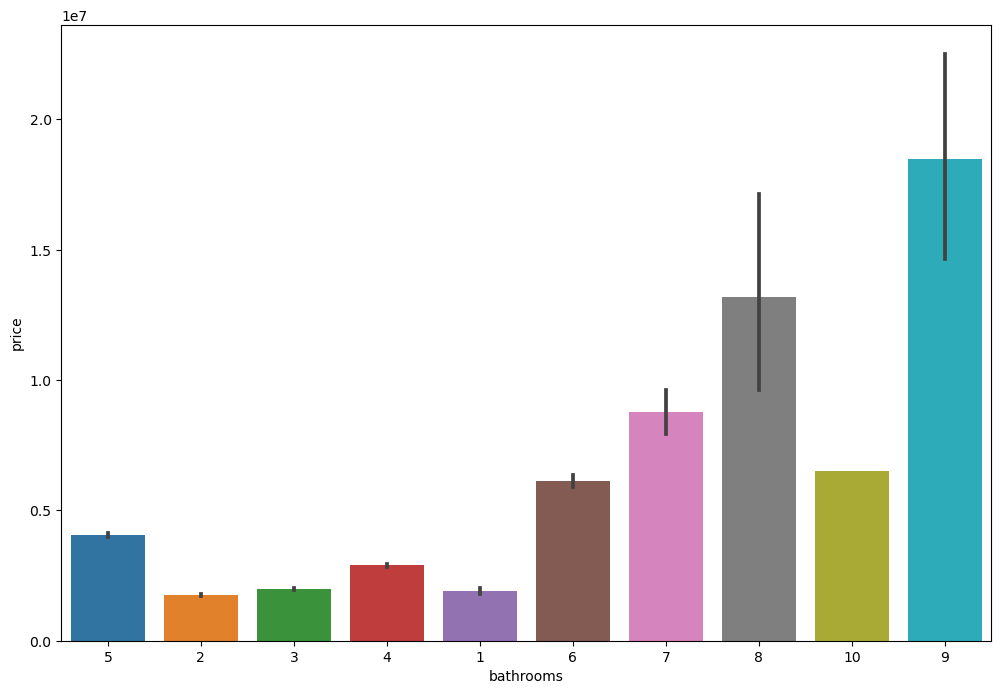

In [9]:
plt.figure(figsize=[12,8])
sns.barplot(x =data.bathrooms, y =data.price, data = data)

<Axes: xlabel='suites', ylabel='price'>

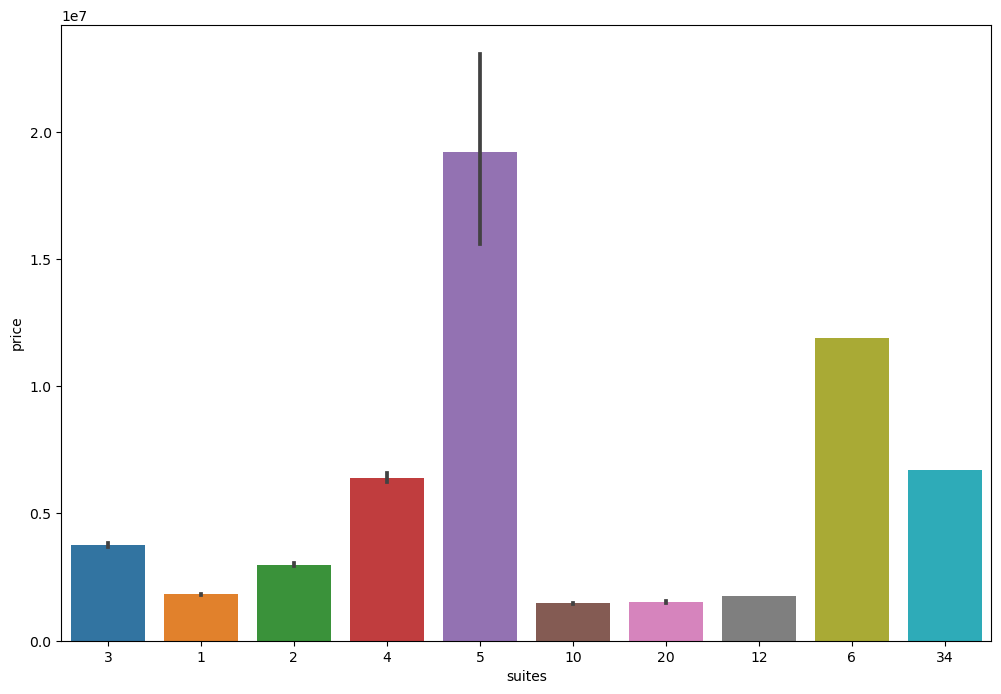

In [10]:
plt.figure(figsize=[12,8])
sns.barplot(x= data.suites, y= data.price, data = data)

<Axes: xlabel='neighborhood', ylabel='price'>

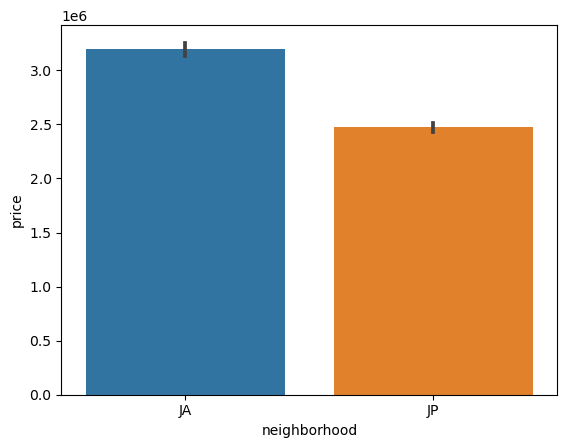

In [11]:
sns.barplot(x= data.neighborhood,y= data.price, data=data)

In [12]:
sc = MinMaxScaler()
data[["Scaleprice"]] = sc.fit_transform(data[["price"]])
data


,area,rooms,suites,bathrooms,parkings,price,neighborhood,Scaleprice
0,230.0,3,3,5,3,3790000.0,JA,0.096438
1,85.0,2,1,2,1,1390000.0,JA,0.034849
2,136.0,3,1,3,1,1590000.0,JA,0.039982
3,136.0,3,1,4,1,1500000.0,JA,0.037672
4,310.0,3,1,4,2,4150000.0,JA,0.105676
...,...,...,...,...,...,...,...,...
17335,115.0,3,1,1,1,954000.0,JP,0.023660
17337,220.0,3,3,4,3,2990000.0,JP,0.075908
17338,115.0,1,1,2,1,1500000.0,JP,0.037672
17339,135.0,3,1,2,1,1680000.0,JP,0.042291


In [13]:
y = data['price']

x = data.drop('price', axis = 1)

x.head(2)


,area,rooms,suites,bathrooms,parkings,neighborhood,Scaleprice
0,230.0,3,3,5,3,JA,0.096438
1,85.0,2,1,2,1,JA,0.034849


In [14]:
le = LabelEncoder()
x['neighborhood'] =le.fit_transform(x['neighborhood'])
le


LabelEncoder()

In [15]:
x.head(5)

,area,rooms,suites,bathrooms,parkings,neighborhood,Scaleprice
0,230.0,3,3,5,3,0,0.096438
1,85.0,2,1,2,1,0,0.034849
2,136.0,3,1,3,1,0,0.039982
3,136.0,3,1,4,1,0,0.037672
4,310.0,3,1,4,2,0,0.105676


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 1/4)

In [17]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [19]:
model = svm = SVR()

In [20]:
model.fit(x_train, y_train)

SVR()

In [21]:
y_pred = model.predict(x_test)
y_pred

array([2177499.14075169, 2179781.18385683, 2177550.32248668, ...,
       2181643.65225109, 2178515.50501047, 2177324.49230504])

In [22]:
y_test.tail()

2594     1500000.0
975      2000000.0
9488     5600000.0
14785    1594000.0
9420      690000.0
Name: price, dtype: float64

In [23]:
y_test.head(5)

10870    1276000.0
12989    3000000.0
13203     900000.0
11609    2170000.0
10647    1450000.0
Name: price, dtype: float64

In [24]:
x_test.head(2)

,area,rooms,suites,bathrooms,parkings,neighborhood,Scaleprice
10870,91.0,2,1,2,1,1,0.031924
12989,225.0,3,3,5,3,1,0.076165


In [25]:
from sklearn.metrics import mean_absolute_error, r2_score,max_error


In [26]:
score =r2_score(y_test, y_pred)
score

-0.0788448645781279

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mae

1353035.7833933455

In [28]:
err = max_error(y_test, y_pred)
err

32820038.175515845

In [29]:
model = LinearRegression()

In [99]:
model.fit(x_train, y_train)

LinearRegression()

In [100]:
y_pred = model.predict(x_test)
y_pred

array([1290000.        , 1950000.        , 1580000.        , ...,
       1690000.        , 1919999.99999999, 1750000.        ])

In [101]:
y_test.tail()

12623     1800000.0
6700     12000000.0
8720      1690000.0
4975      1920000.0
6427      1750000.0
Name: price, dtype: float64

In [102]:
y_test.head(5)

740      1290000.0
2943     1950000.0
11837    1580000.0
8296     2700000.0
13615    4850000.0
Name: price, dtype: float64

In [103]:
x_test.head(2)

,area,rooms,suites,bathrooms,parkings,neighborhood,Scaleprice
740,110.0,3,1,2,1,0,0.032283
2943,190.0,4,1,4,3,0,0.049220


In [104]:
from sklearn.metrics import mean_absolute_error, r2_score,max_error


In [105]:
score =r2_score(y_test, y_pred)
score

1.0

In [106]:
mae = mean_absolute_error(y_test, y_pred)
mae

2.8845025929076712e-09

In [107]:
err = max_error(y_test, y_pred)
err

1.1641532182693481e-07